<a href="https://colab.research.google.com/github/samsomsabu/machine_learning/blob/main/2348549_decision_tree_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [37]:

# Load your dataset (replace 'your_data.csv' with the actual file path)
data = pd.read_csv('/content/heart.csv')


In [38]:

# Perform data preprocessing
# Assuming 'sex,' 'cp,' 'fbs,' 'restecg,' 'exang,' 'slope,' 'ca,' and 'thal' are categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [39]:

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])


numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns



In [41]:


# Summary statistics
summary_stats = data.describe()


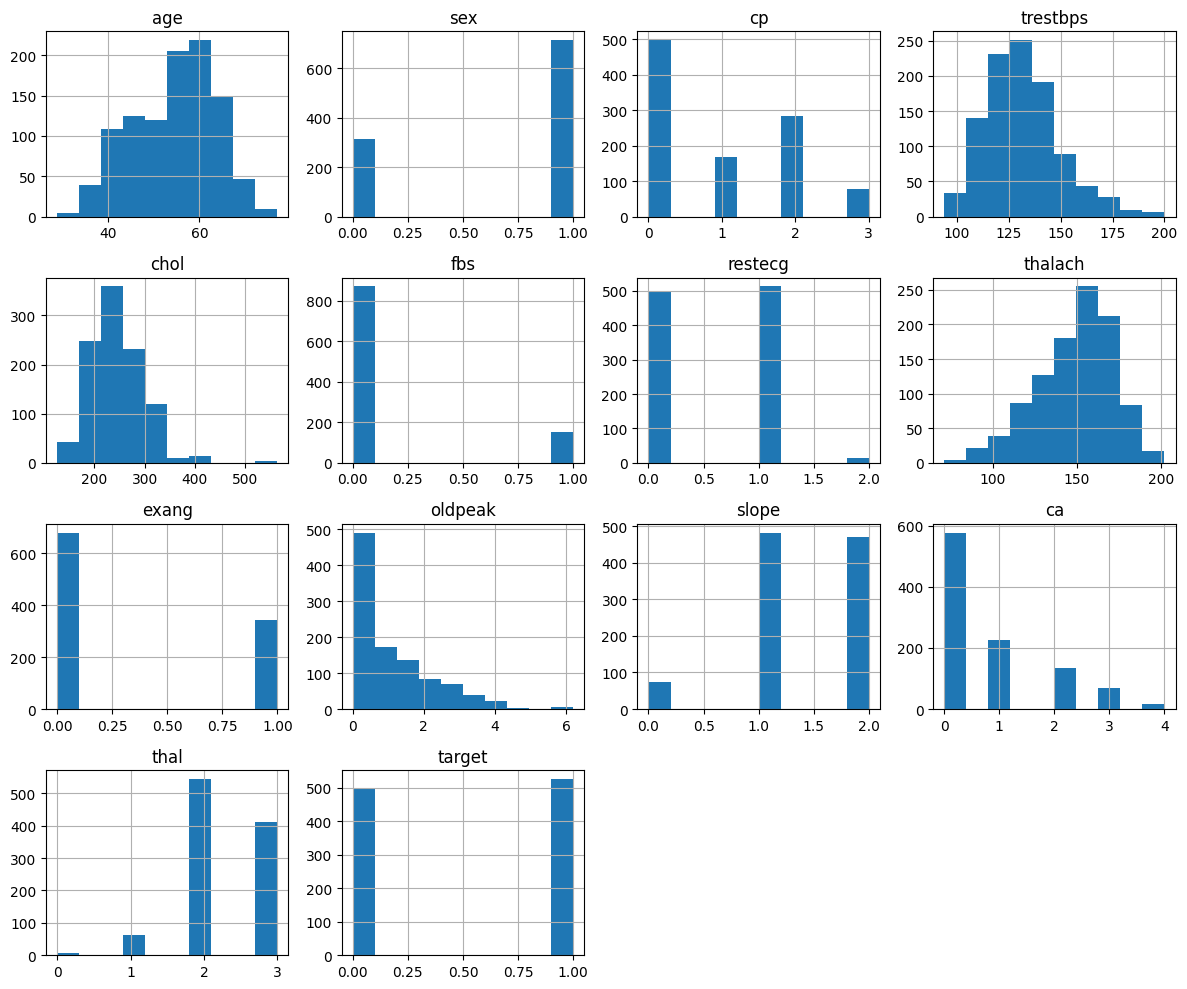

In [42]:

# Data distribution
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


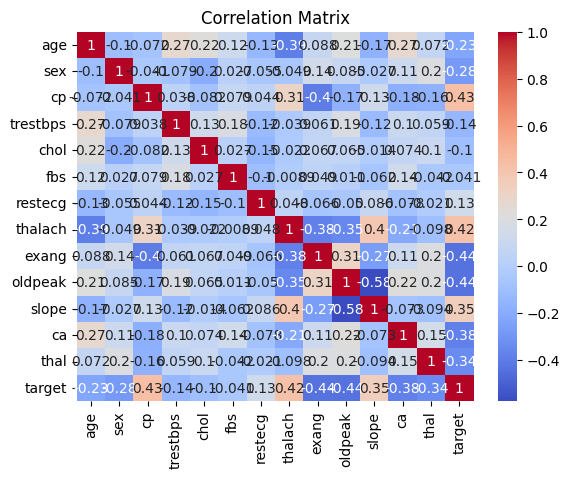

In [43]:

# Correlation analysis
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


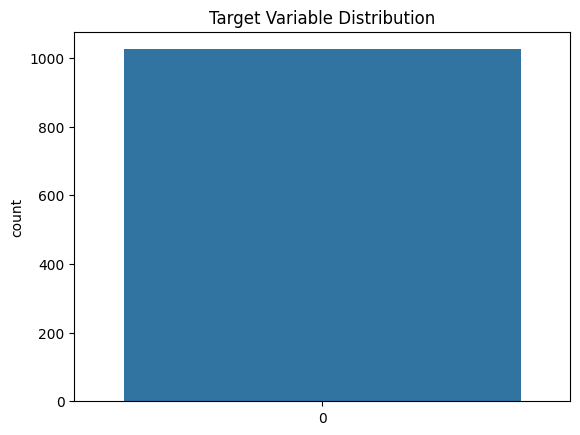

In [44]:

# Target distribution
sns.countplot(data['target'])
plt.title("Target Variable Distribution")
plt.show()


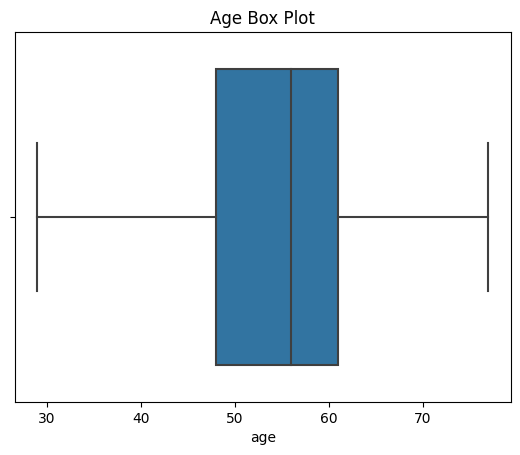

In [45]:

# Outlier detection (example for 'age' feature)
sns.boxplot(x=data['age'])
plt.title("Age Box Plot")
plt.show()


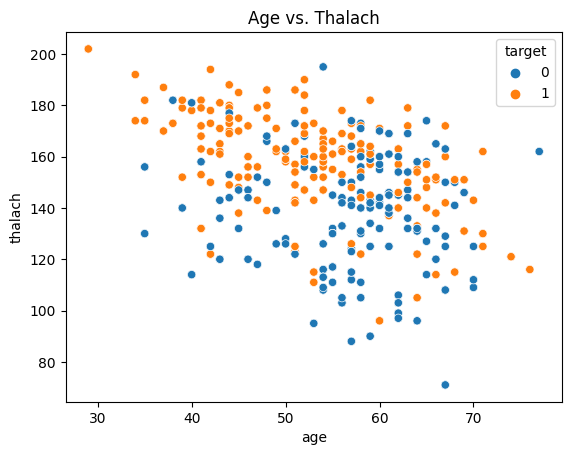

In [46]:

# Data visualization (example for 'age' vs. 'thalach')
sns.scatterplot(x='age', y='thalach', data=data, hue='target')
plt.title("Age vs. Thalach")
plt.show()


In [47]:

# Missing data analysis
missing_data = data.isnull().sum()


In [48]:

# Split the data into features and target
X = data.drop(columns=['target'])
y = data['target']


In [49]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:

# Create a Decision Tree Regressor with the preprocessor
regressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])


In [51]:

# Train the model
regressor.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [54]:

# Make predictions on the test data
y_pred = regressor.predict(X_test)




In [55]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.014634146341463415
R-squared Score: 0.9414620217018846
